# 🧭 Exploratory Data Analysis: Fuel Price Dataset

# ⛽ Queensland Fuel Price EDA

This project analyzes Queensland fuel price data from 2023. The goal is to uncover patterns in pricing by brand, location, fuel type, and time — and to detect anomalies or inconsistencies.

## 🔍 Key Questions:
- Which brands are most/least expensive?
- Are prices higher in certain regions?
- Do prices vary by fuel type and day of week?
- Are there data quality issues (e.g., outliers, flat values)?

## 🧠 Highlights:
- Metro Fuel consistently undercuts the market
- e85 shows abnormal flat pricing late in the year
- Fuel prices tend to rise in northern/remote areas


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

## 1. 📦 Data Loading

In [ ]:
df= pd.read_csv("C:\Users\negia\Carrer_Rundown\data_analysis\QLD_Fuel_anomaly_detection\data\qld_fuel.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'SiteId', 'Site_Name', 'Site_Brand',
       'Sites_Address_Line_1', 'Site_Suburb', 'Site_State', 'Site_Post_Code',
       'Site_Latitude', 'Site_Longitude', 'Fuel_Type', 'Price',
       'TransactionDateutc', 'X_id'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc,X_id
0,1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1999,2023-10-12 21:56:00,NaN
1,2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2159,2023-12-30 06:54:00,NaN
2,3,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1959,2023-12-30 06:54:00,NaN
3,4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1990,2023-06-12 22:00:00,NaN
4,5,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Unleaded,1920,2023-06-12 22:00:00,NaN


## 2. 🧹 Data Cleaning & Preprocessing

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc,X_id
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1999,2023-10-12 21:56:00,NaN
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2159,2023-12-30 06:54:00,NaN
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1959,2023-12-30 06:54:00,NaN
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1990,2023-06-12 22:00:00,NaN
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Unleaded,1920,2023-06-12 22:00:00,NaN


In [7]:
df["TransactionDateutc"] = pd.to_datetime(df["TransactionDateutc"])

In [28]:
df.describe()

,SiteId,Site_Post_Code,Site_Latitude,Site_Longitude,Price,TransactionDateutc,X_id
count,6.159770e+05,615977.000000,615977.000000,615977.000000,615977.000000,615977,121457.000000
mean,6.142739e+07,4306.814573,-26.567146,152.299510,2005.466738,2023-06-27 20:46:26.263740928,21642.665775
min,6.129015e+07,2486.000000,-28.973467,138.117892,1.000000,2022-12-31 14:00:00,1.000000
25%,6.140169e+07,4118.000000,-27.655108,152.762458,1869.000000,2023-03-22 20:33:00,10173.000000
50%,6.140235e+07,4214.000000,-27.516283,153.017227,1999.000000,2023-06-29 07:36:00,20398.000000
75%,6.147710e+07,4505.000000,-27.182251,153.116836,2139.000000,2023-09-27 23:57:00,32364.000000
max,6.147822e+07,4895.000000,-9.750595,153.541441,9000.000000,2023-12-31 13:12:00,50901.000000
std,3.510785e+04,250.186277,2.579898,1.955101,203.584045,NaN,13574.650949


In [33]:
df.isnull().sum()

SiteId                       0
Site_Name                    0
Site_Brand                   0
Sites_Address_Line_1         0
Site_Suburb                  0
Site_State                   0
Site_Post_Code               0
Site_Latitude                0
Site_Longitude               0
Fuel_Type                    0
Price                        0
TransactionDateutc           0
X_id                    494520
dtype: int64

In [34]:
df=df.drop("X_id", axis=1)

In [35]:
df.head()

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1999,2023-10-12 21:56:00
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2159,2023-12-30 06:54:00
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1959,2023-12-30 06:54:00
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1990,2023-06-12 22:00:00
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Unleaded,1920,2023-06-12 22:00:00


In [14]:
df["Site_Brand"].unique()

array(['Liberty', 'BP', '7 Eleven', 'EG Ampol', 'Coles Express', 'Ampol',
       'Caltex', 'Freedom Fuels', 'Metro Fuel', 'Pearl Energy',
       'Independent', 'Shell', 'Puma Energy', 'United',
       'Pacific Petroleum', 'Mobil', 'Pacific Fuel Solutio', 'Matilda',
       'Enhance', 'Astron', 'Lowes', 'IOR Petroleum', 'Unknown', 'Choice',
       'Costco'], dtype=object)

##  🔗 Bivariate and Grouped Analysis

In [8]:
#statistical analysis of fuel_type
gb=df.groupby("Fuel_Type")

In [9]:
avg_fuel_price = gb["Price"].mean()

<Axes: title={'center': 'Average Fuel Price by Fuel Type'}, xlabel='Fuel_Type'>

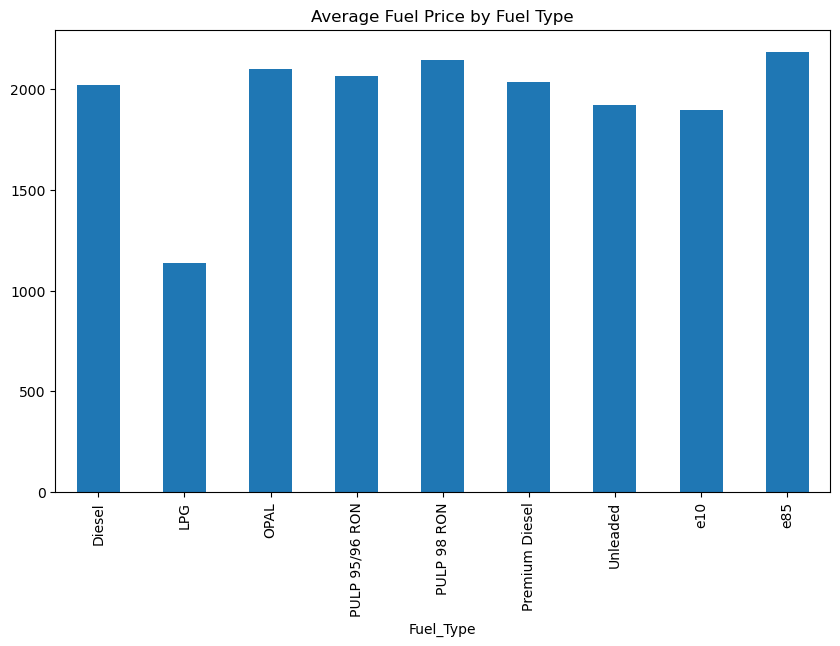

In [42]:
avg_fuel_price.plot(kind='bar', figsize=(10, 6), title='Average Fuel Price by Fuel Type')

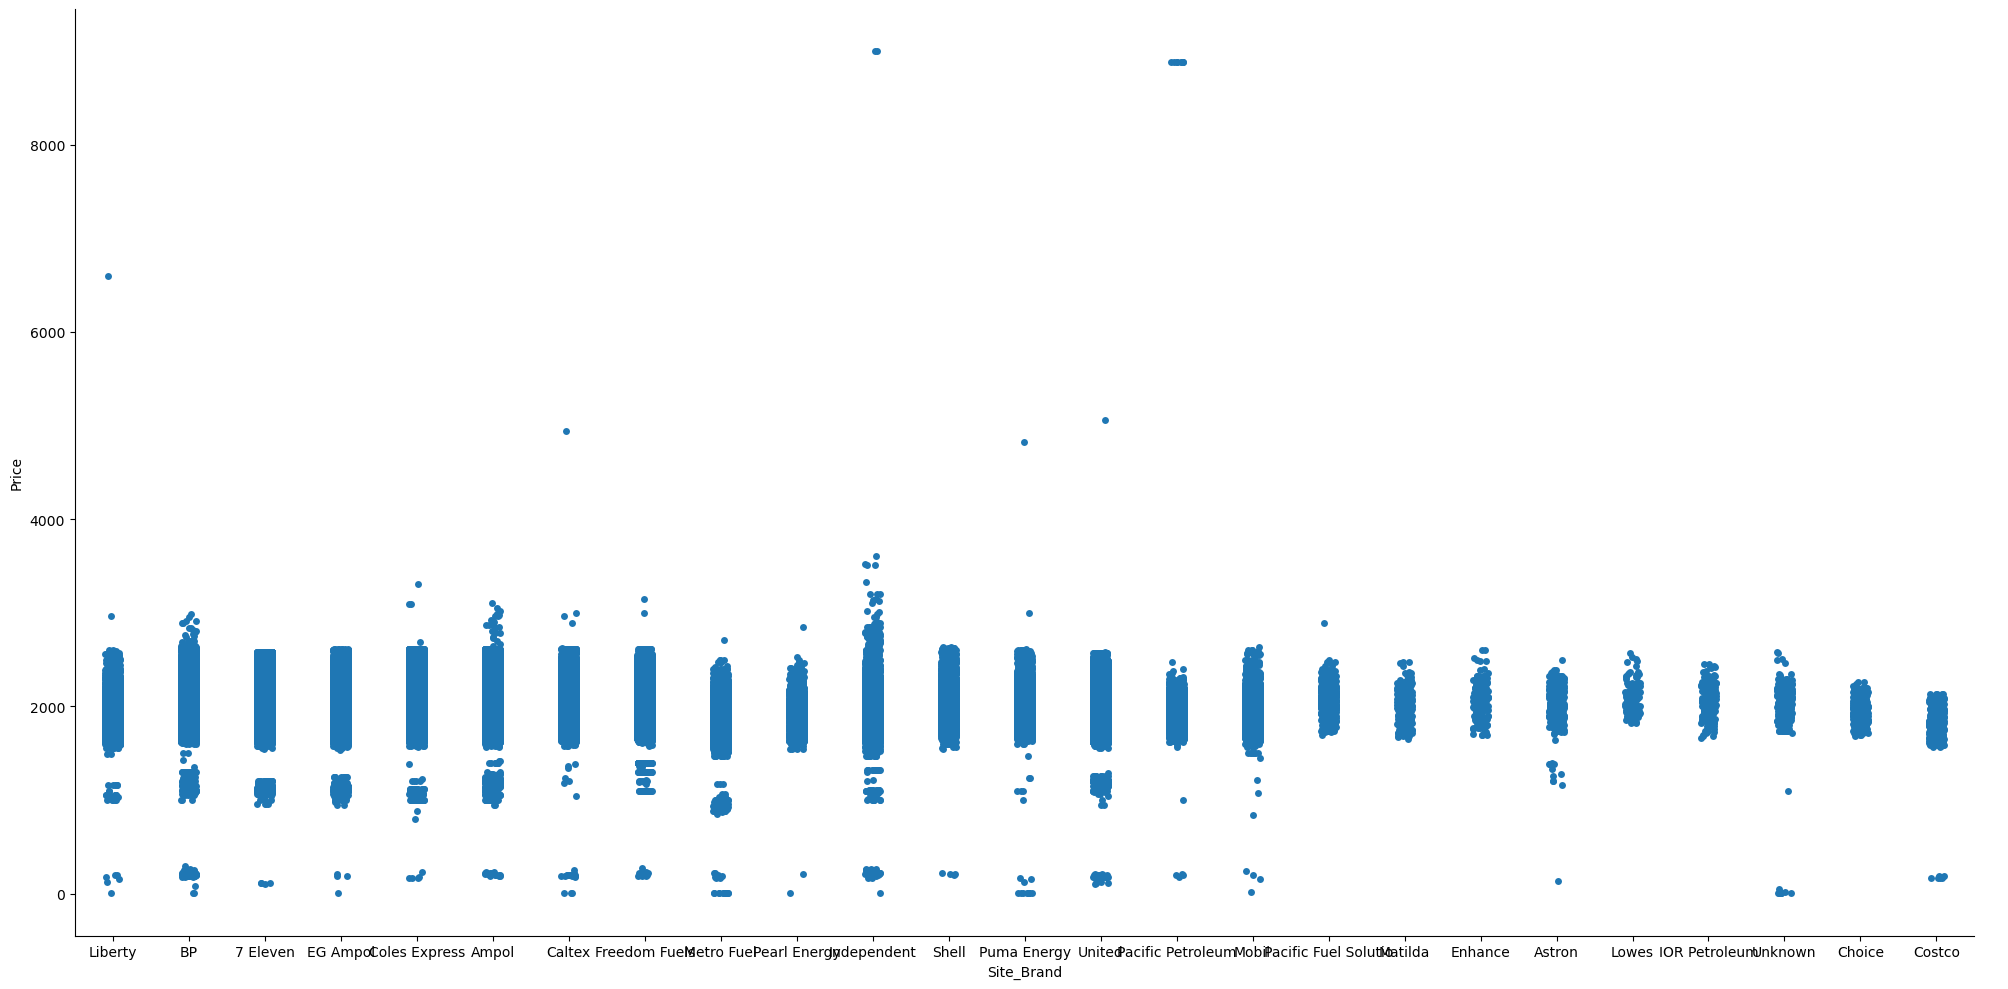

In [47]:
sns.catplot(data=df, x='Site_Brand', y='Price',height=10,aspect=2)

#### The plot shows the distribution of fuel prices, irrespective of type of fuel, vs. each brand. Trends that can be observed here are that the Independent has a higher price distribution than other brands, indicating it usually charges more. Brands such as Choice and Shell have tight clusters which are not too distributed, hence indicating a consistency in price levels. Some outliers also exist, that go all the way up and beyond of 8000

In [10]:
num_rows_high_price = df[df['Price'] <200].shape[0]
# shape[0] returns the number of rows in the filtered DataFrame (i.e., the count of rows where Price > 4000)
print(f"Number of rows with Price > 4000: {num_rows_high_price}")

Number of rows with Price > 4000: 193


In [11]:
condition= (df['Price'] <4000) & (df['Price']>200)

In [12]:
sane_price = df[condition]

## 6. 🌍 Geospatial Insights

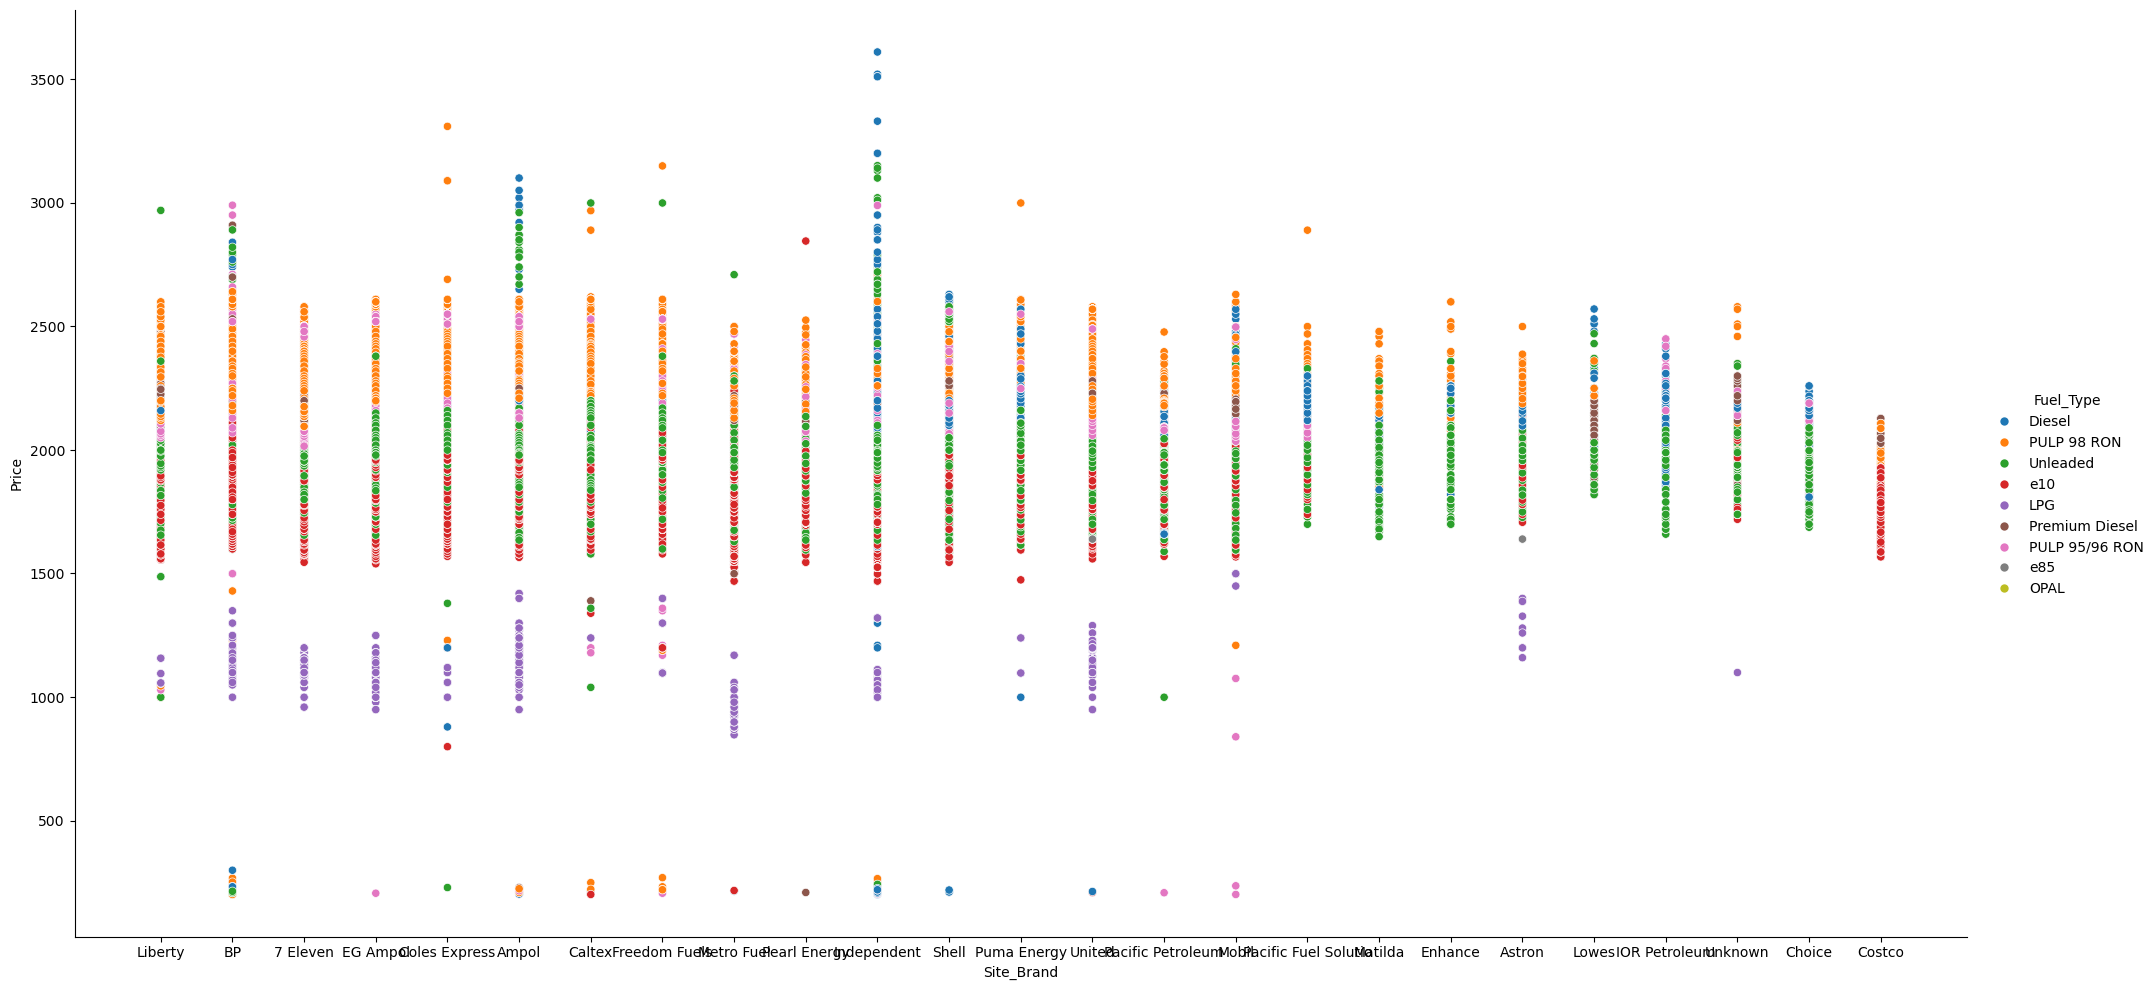

In [9]:
sns.relplot(data=sane_price, x='Site_Brand', y='Price',hue= 'Fuel_Type', kind='scatter', height=10, aspect=2)

#### The inclusion of fuel type as hue shows which fuel type is usually higher in cost, and which is lower. It can be observed that for each brand, the prices of disel and Pulp 98 RON are generally higher, while prices of Pulp 95-96 RON are generally lower. Also in certain cases such as Ampol,Caltex,Freedom, the prices of Pulp 98 RON are even lower than 500, which can be a case of outliers too or maybe a certain trend that needs to be further analysed

In [17]:
pulp98_low_price = df[(df['Fuel_Type'] == 'PULP 98 RON') & (df['Price'] < 500)]
brand_counts = pulp98_low_price['Site_Brand'].value_counts()
print("Low price counts by brand:\n", brand_counts)

# Check distribution by location (suburb)
suburb_counts = pulp98_low_price['Site_Suburb'].value_counts()
print("\nLow price counts by suburb:\n", suburb_counts)

# Check distribution by date
pulp98_low_price['TransactionDateutc'] = pd.to_datetime(pulp98_low_price['TransactionDateutc'])
date_counts = pulp98_low_price['TransactionDateutc'].dt.year.value_counts()
print("\nLow price counts by year:\n", date_counts)

# Check for extremely low values
print("\nLowest prices:\n", pulp98_low_price['Price'].sort_values().head(10))

# Summary statistics
print("\nSummary statistics for low prices:\n", pulp98_low_price['Price'].describe())


Low price counts by brand:
 Site_Brand
BP               18
Freedom Fuels     5
Caltex            4
Independent       4
United            4
Ampol             4
Costco            3
Metro Fuel        3
Unknown           2
Liberty           2
EG Ampol          1
Shell             1
Name: count, dtype: int64

Low price counts by suburb:
 Site_Suburb
Toogoolawah          10
Normanton             5
Warwick               4
Arcadia               3
Harristown            3
Springsure            2
Miami                 2
Kallangur             1
Bundamba              1
Coomera               1
North Lakes           1
Upper Coomera         1
Eight Mile Plains     1
Mitchelton            1
Indooroopilly         1
Thornlands            1
Bokarina              1
Currumbin             1
Aratula               1
Paddington            1
Bauhinia              1
Sandgate              1
Dysart                1
Seaforth              1
Craiglie              1
Glenella              1
Rochedale South       1
Darra

C:\Users\negia\AppData\Local\Temp\ipykernel_28840\3157766669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulp98_low_price['TransactionDateutc'] = pd.to_datetime(pulp98_low_price['TransactionDateutc'])


In [18]:
# Apply .copy() to avoid warning
bp_toogoolawah_low_prices = df[
    (df['Fuel_Type'] == 'PULP 98 RON') &
    (df['Price'] < 500) &
    (df['Site_Brand'] == 'BP') &
    (df['Site_Suburb'] == 'Toogoolawah')
].copy()

# Check how many of BP's low-price entries come from this suburb
print(f"Low PULP98 price records from BP in Toogoolawah: {len(bp_toogoolawah_low_prices)}")

# Total BP low price entries
bp_total_low = len(df[
    (df['Fuel_Type'] == 'PULP 98 RON') &
    (df['Price'] < 500) &
    (df['Site_Brand'] == 'BP')
])

print(f"Total low PULP98 price records from BP: {bp_total_low}")

# What percentage?
percentage = len(bp_toogoolawah_low_prices) / bp_total_low * 100
print(f"Percentage of BP low prices from Toogoolawah: {percentage:.2f}%")


Low PULP98 price records from BP in Toogoolawah: 10
Total low PULP98 price records from BP: 18
Percentage of BP low prices from Toogoolawah: 55.56%


In [19]:
bp_toogoolawah_low_prices['SiteId'].value_counts()


SiteId
61402476    10
Name: count, dtype: int64

#### This one station — SiteId 61402476 (BP in Toogoolawah) — is the primary contributor to the brand's anomalously low PULP 98 RON prices,  accounting for over 55% of such cases across all BP stations.

    This strongly suggests:

    Localized data reporting issue

    Or possibly a mislabeled fuel type or price recording mistake

In [15]:
sane_price['TransactionDate'] = sane_price['TransactionDateutc'].dt.date

C:\Users\negia\AppData\Local\Temp\ipykernel_6180\1464170872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sane_price['TransactionDate'] = sane_price['TransactionDateutc'].dt.date


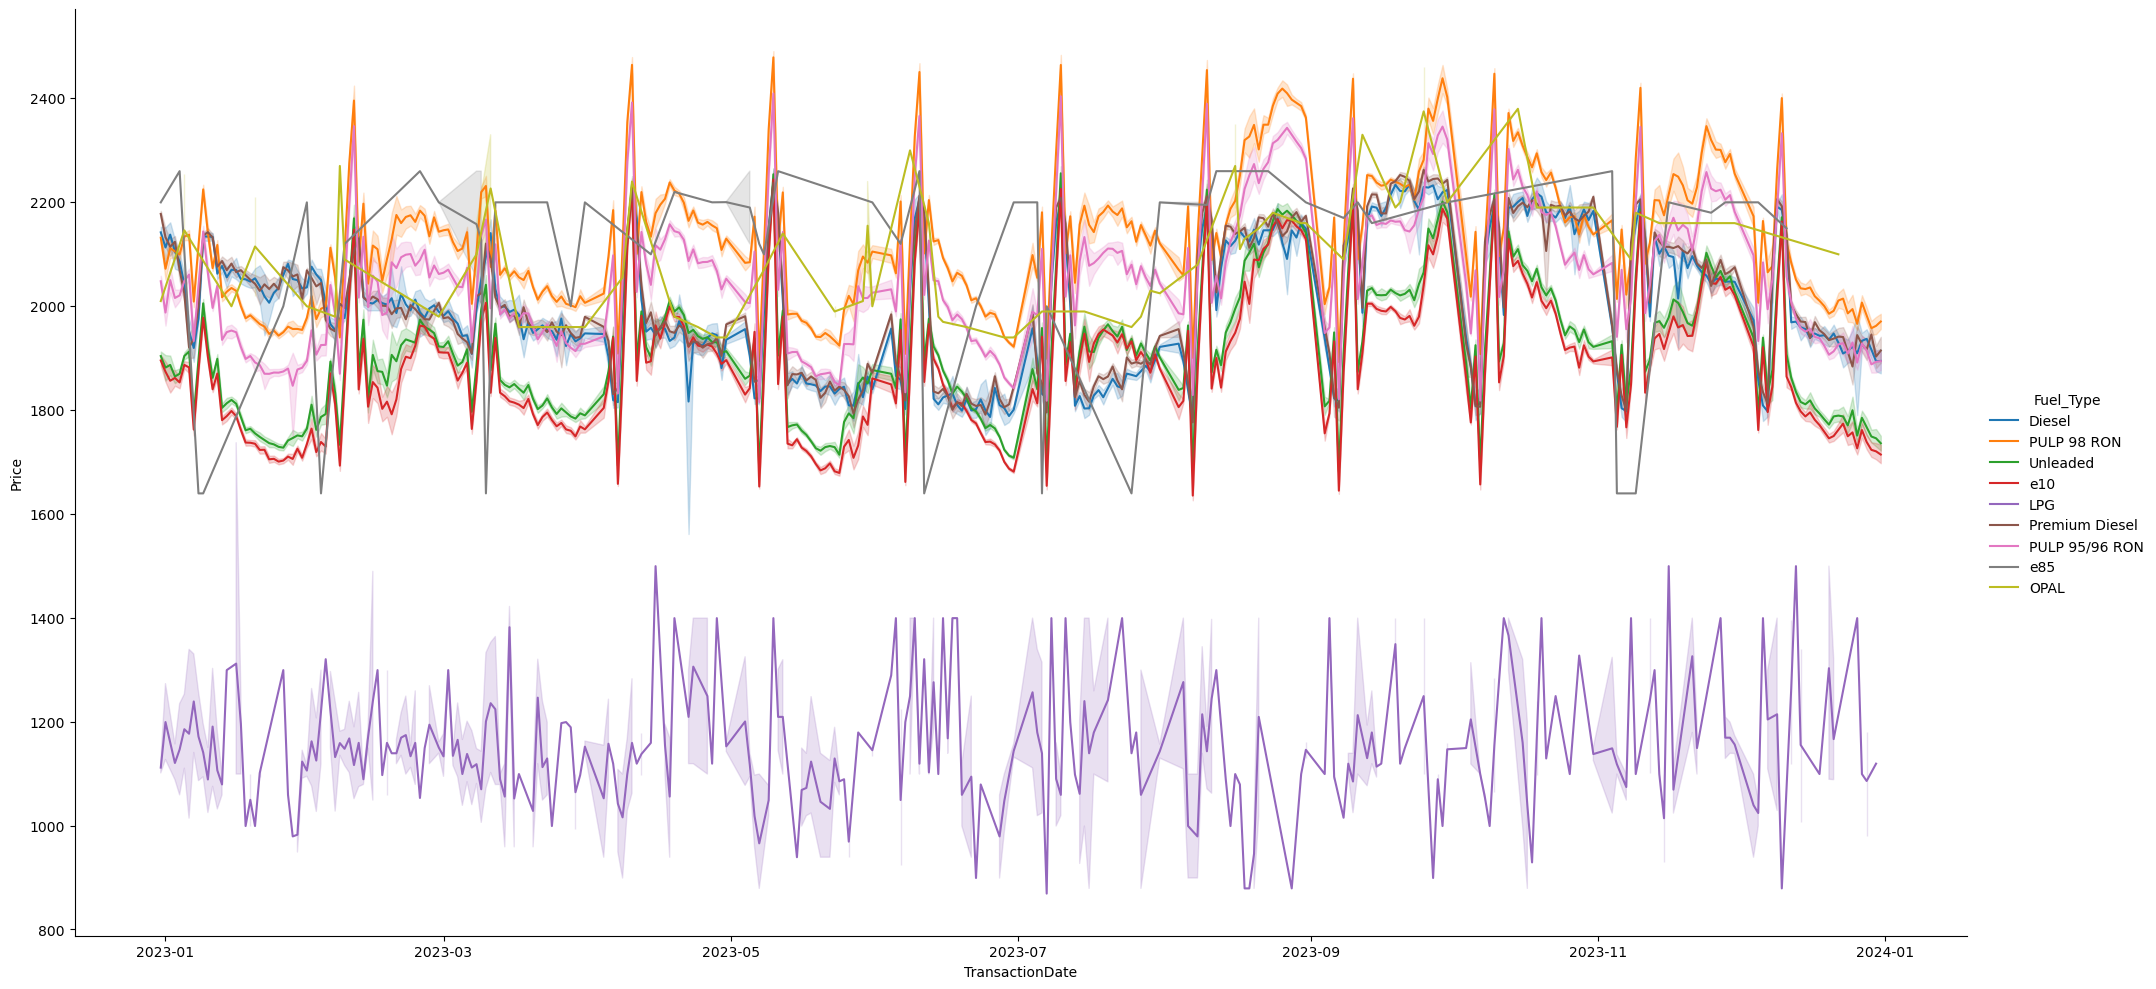

In [16]:
sns.relplot(data=sane_price, x="TransactionDate", y="Price",hue="Fuel_Type",kind="line", height=10, aspect=2) 

### This line plot shows how fuel prices changed over time throughout 2023, grouped by Fuel_Type.

    Most fuel types follow a regular cyclic pattern, likely tied to weekly or retail pricing behavior — sharp spikes and dips repeat consistently. As expected, higher-octane fuels like PULP 98 RON and PULP 95/96 RON remain at the top end of the price range, while e10 and Diesel stay on the lower end.

    One outlier is e85, which drops sharply in price around November 2023 and stays flat at a lower level through early 2024. That pattern differs significantly from the others, which continue to fluctuate. This could indicate a pricing anomaly, a local promotion, or a reporting issue specific to e85.

<Axes: xlabel='TransactionDate', ylabel='Price'>

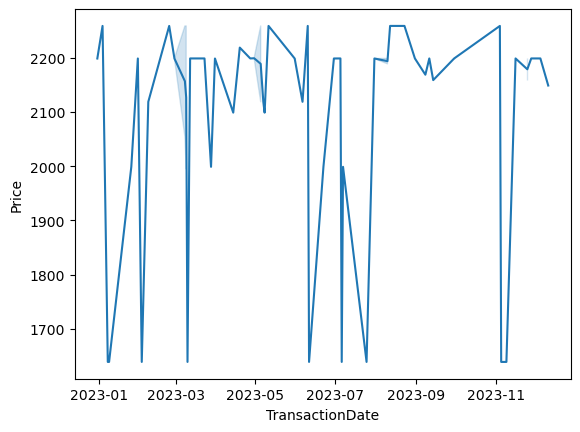

In [17]:
e85 = sane_price[sane_price['Fuel_Type'] == 'e85'].copy()
sns.lineplot(data=e85, x='TransactionDate', y='Price')


#### While most fuel types continue to follow their usual fluctuating trends, the price of e85 exhibits a sharp drop around late October 2023, followed by a sustained flat period through to the end of the year. This is particularly visible in the line plot where e85 forms a distinct plateau, contrasting with the movement seen in other fuels.

In [21]:
e85 = df[df['Fuel_Type'] == 'e85'].copy()
e85['TransactionDate'] = pd.to_datetime(e85['TransactionDateutc'])
flat_period = e85[(e85['TransactionDate'] >= '2023-10-20') & (e85['TransactionDate'] <= '2023-12-31')]

daily_counts = flat_period.groupby('TransactionDate').size()
print(daily_counts.describe())


count    9.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
dtype: float64


In [22]:
flat_period['SiteId'].value_counts()


SiteId
61477034    2
61477931    2
61470012    2
61401646    1
61402448    1
61478027    1
Name: count, dtype: int64

In [23]:
pre_period = e85[(e85['TransactionDate'] < '2023-10-01')]
post_period = e85[(e85['TransactionDate'] > '2024-01-01')]

print("Pre-period unique prices:", pre_period['Price'].nunique())
print("Post-period unique prices:", post_period['Price'].nunique())


Pre-period unique prices: 13
Post-period unique prices: 0


#### Between late October and the end of 2023, e85 price data appears artificially flat, not because the price truly stabilized, but because very few stations reported it, and each submitted just one or two values. This suggests either a lapse in reporting, a supply issue, or e85 temporarily falling out of circulation. No new e85 records appear after that period.

In [24]:
brand_summary = df.groupby('Site_Brand')['Price'].agg(count='count', mean='mean').reset_index()


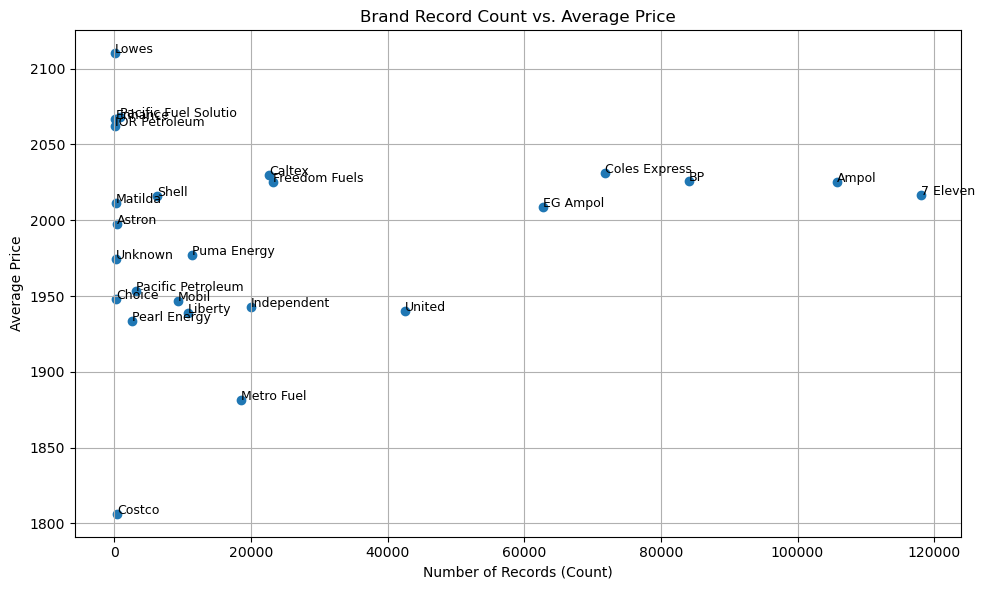

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(brand_summary['count'], brand_summary['mean'])

# Add brand labels to each point
for i in range(len(brand_summary)):
    plt.text(brand_summary['count'][i], brand_summary['mean'][i], brand_summary['Site_Brand'][i], fontsize=9)

plt.xlabel('Number of Records (Count)')
plt.ylabel('Average Price')
plt.title('Brand Record Count vs. Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


Brand-Level Record Count vs. Average Price
This scatter plot shows how each fuel brand compares in terms of how many price records it has vs. its average fuel price.

Some patterns that stand out:

The big players (7 Eleven, Ampol, BP) have the highest record counts, and their average prices are pretty close together (~2050–2100). No surprise there — they likely have more consistent pricing due to scale.

On the other hand, a few smaller brands like Lowes, IOR Petroleum, and Pacific Fuel Solutions have really high average prices despite having very few records. That could be a real pricing difference, or it could just be noise — might be worth checking if they’re mostly selling premium fuel types or if there are any outliers.

Costco is on the opposite end — super low average price with very few records. That does match their typical pricing model, so not necessarily unexpected.

Metro Fuel also stands out — lower average price than most mid-volume brands. Might be worth digging into whether they operate in a specific region or if they mainly sell cheaper fuel types.

In [25]:
df[df['Site_Brand'] == 'Lowes'].sort_values(by='Price', ascending=False).head()


,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc,X_id
591211,61402500,Explorer Rest,Lowes,33 Stafford Street,THargomindah,QLD,4492,-27.994204,143.823007,Diesel,2570,2023-09-18 22:02:00,NaN
418659,61402500,Explorer Rest,Lowes,33 Stafford Street,THargomindah,QLD,4492,-27.994204,143.823007,Diesel,2530,2023-08-25 22:12:00,NaN
418658,61402500,Explorer Rest,Lowes,33 Stafford Street,THargomindah,QLD,4492,-27.994204,143.823007,Diesel,2510,2023-10-08 20:43:00,NaN
231903,61402500,Explorer Rest,Lowes,33 Stafford Street,THargomindah,QLD,4492,-27.994204,143.823007,Diesel,2480,2023-03-01 20:17:00,26348.0
591212,61402500,Explorer Rest,Lowes,33 Stafford Street,THargomindah,QLD,4492,-27.994204,143.823007,Unleaded,2470,2023-09-18 22:02:00,NaN


In [26]:
df.groupby(['Site_Brand', 'Fuel_Type'])['Price'].mean().unstack().fillna(0)


Fuel_Type,Diesel,LPG,OPAL,PULP 95/96 RON,PULP 98 RON,Premium Diesel,Unleaded,e10,e85
Site_Brand,,,,,,,,,
7 Eleven,1679.000000,1100.733083,0.000000,2066.908172,2145.986501,2039.243791,1946.063866,1926.201281,0.000000
Ampol,2023.817221,1167.590047,0.000000,2091.160882,2168.194921,2061.238787,1930.715511,1922.296285,0.000000
Astron,2068.169492,1209.250000,0.000000,2138.862069,2165.055556,0.000000,1939.009709,1923.488095,2026.500000
BP,2015.135612,1154.905512,0.000000,2070.177136,2145.716817,2039.477129,1913.912111,1905.666060,0.000000
Caltex,2015.896429,620.000000,0.000000,2078.981530,2174.824218,2053.691853,1945.814066,1929.670714,0.000000
Choice,2000.375000,0.000000,0.000000,1986.595506,0.000000,0.000000,1863.640000,0.000000,0.000000
Coles Express,2051.957224,1063.878049,0.000000,2091.596379,2163.089179,2151.314650,1930.987518,1913.077277,0.000000
Costco,0.000000,0.000000,0.000000,0.000000,1878.902655,1866.147541,0.000000,1705.948052,0.000000
EG Ampol,2058.055046,1115.379747,2049.420000,2068.288679,2152.140891,2053.191762,1930.991328,1912.854410,0.000000


##### Why Lowes Has a High Average Price
    Looking at the brand vs. fuel type breakdown, it’s clear that Lowes only reports prices for Diesel, Premium Diesel, and high-octane fuels (PULP 95/96 RON, PULP 98 RON). These are all among the most expensive fuel types, which explains why Lowes shows a high average price in the earlier scatter plot.

    This doesn’t necessarily mean Lowes is overpriced — just that its price profile reflects a fuel-type bias. A brand that mostly sells Diesel will naturally show a higher average than one focused on Unleaded or e10.



In [27]:
metro = df[df['Site_Brand'] == 'Metro Fuel']
metro['Fuel_Type'].value_counts()


Fuel_Type
e10               5957
Premium Diesel    5360
Unleaded          2793
PULP 98 RON       2164
Diesel            1410
PULP 95/96 RON     748
LPG                 87
Name: count, dtype: int64

In [28]:
metro.groupby('Fuel_Type')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Fuel_Type,,,,,,,,
Diesel,1410.0,1968.726950,141.246589,215.0,1885.0,1949.0,2067.0,2469.0
LPG,87.0,954.839080,63.916529,847.0,899.0,939.0,999.0,1169.0
PULP 95/96 RON,748.0,1963.482620,156.839889,1.0,1849.0,1949.0,2065.0,2469.0
PULP 98 RON,2164.0,2032.477819,149.639258,1.0,1939.0,2015.0,2129.0,2499.0
Premium Diesel,5360.0,1931.320709,149.675579,1.0,1819.0,1929.0,2049.0,2289.0
Unleaded,2793.0,1830.214107,152.967628,1.0,1739.0,1817.0,1929.0,2709.0
e10,5957.0,1788.908679,142.496243,1.0,1699.0,1769.0,1889.0,2279.0


In [29]:
# Market-wide fuel type averages
market_avg = df.groupby('Fuel_Type')['Price'].mean()

# Metro vs market comparison
metro.groupby('Fuel_Type')['Price'].mean() - market_avg


Fuel_Type
Diesel            -51.802868
LPG              -182.309627
OPAL                     NaN
PULP 95/96 RON   -104.125235
PULP 98 RON      -110.973649
Premium Diesel   -102.640821
Unleaded          -92.728675
e10              -109.464621
e85                      NaN
Name: Price, dtype: float64

In [30]:
metro['Site_Suburb'].value_counts().head(10)


Site_Suburb
Fernvale        3801
Greenbank       1942
Hillcrest       1937
Harristown      1747
Marsden         1714
Sandgate        1133
Toowoomba       1035
Nerang           448
Innisfail        333
Acacia Ridge     330
Name: count, dtype: int64

Metro Fuel consistently prices below the market average across all fuel types, undercutting by ~90 to 180 cents per litre depending on the product. This includes Diesel, e10, and even premium fuels like PULP 98 RON.

A large share of Metro’s price records come from suburbs like Fernvale, Greenbank, and Hillcrest — areas where pricing tends to be lower than inner-city averages. This strongly supports the idea that Metro Fuel targets budget-conscious suburban regions, and is likely positioned as a low-cost fuel retailer rather than being misrepresented by data errors or skewed product mix.

No major data issues were observed aside from a few very low price outliers (e.g., 1.0), which should be filtered before modeling or statistical analysis.

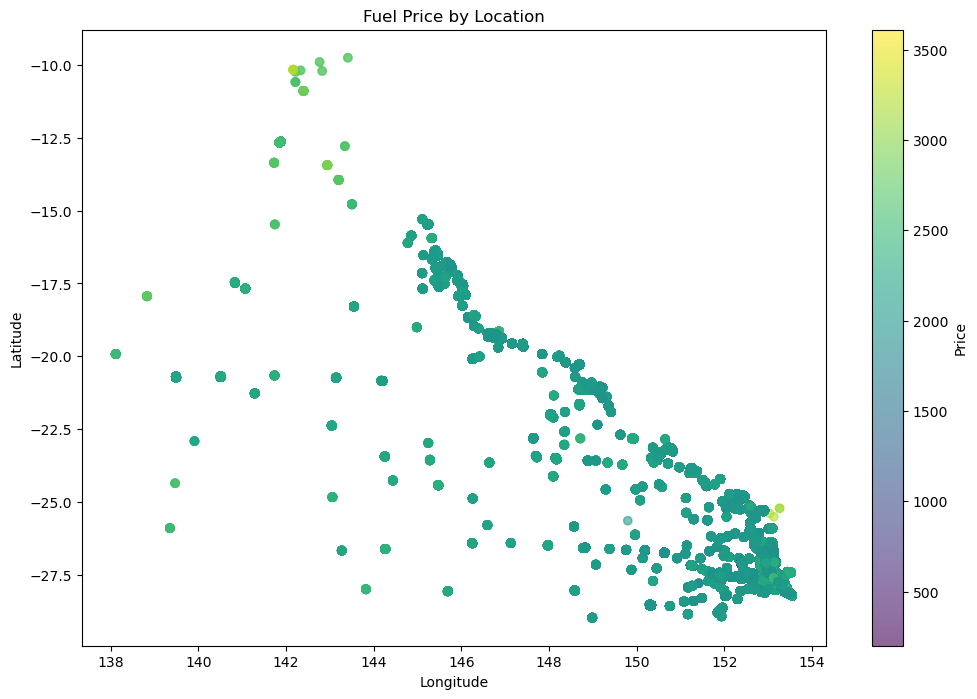

In [37]:
plt.figure(figsize=(12, 8))
sc = plt.scatter(sane_price['Site_Longitude'], sane_price['Site_Latitude'], c=sane_price['Price'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fuel Price by Location')
plt.show()


#### This scatter plot shows geographic fuel price variation across Queensland, Australia.

    Higher latitudes (further north) tend to have higher prices, likely due to transportation costs and low station density in remote areas.

    South-east Queensland (around Brisbane, Gold Coast) shows a dense cluster of lower prices, consistent with competitive urban markets.

    A few extreme outliers appear in very remote areas — these may reflect either real-world pricing extremes or possible data anomalies worth flagging.

<Axes: xlabel='DayOfWeek', ylabel='Price'>

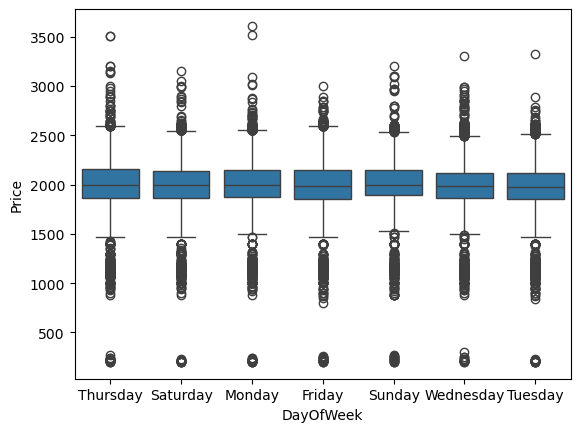

In [ ]:
sane_price['DayOfWeek'] = pd.to_datetime(sane_price['TransactionDateutc']).dt.day_name()
sns.boxplot(data=sane_price, x='DayOfWeek', y='Price')


This boxplot shows fuel price distributions for each day of the week. Prices appear fairly stable across the week, with only minor variation in median values. There's no obvious “cheapest” or “most expensive” day, though:

Monday shows slightly more high-price outliers.

Thursday to Saturday have slightly wider spreads, possibly reflecting weekend pricing adjustments.

Median prices remain tightly clustered, suggesting that fuel prices in this dataset don’t follow strong weekly retail cycles (at least in aggregate).

This insight is useful for modeling, as day-of-week may not need strong emphasis as a feature — though it could still matter locally or for certain brands.

## 📌 Final Takeaways

- Brand pricing varies significantly; Metro Fuel is consistently cheapest
- Regional differences are clear — more remote → more expensive
- e85 pricing anomaly suggests missing or stale data
- No strong price pattern across days of week
